In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
%matplotlib inline

In [2]:
train_path = "/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images"

In [3]:
# create dictionary with file path and labes
info = {"label":[], "path":[]}
for directory in os.listdir(train_path):
    for file in os.listdir(train_path+"/"+directory):
        info["label"].append(directory)
        info["path"].append(train_path+"/"+directory+"/"+file)

In [4]:
# convert dictionary into dataframe 
df = pd.DataFrame(info)

In [5]:
# check that the dataframe is correctly done
sample = df.sample(10)
for line in sample.iterrows():
    print("label:{}\tpath:{}\n".format(line[1][0], line[1][1]))

label:unknown	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/unknown/3efa7ec4_nohash_1.png

label:stop	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/stop/9080f6d3_nohash_0.png

label:on	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/on/9d050657_nohash_0.png

label:unknown	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/unknown/dce5041a_nohash_0.png

label:left	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/left/d55aa56c_nohash_0.png

label:up	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/up/ad89eb1e_nohash_0.png

label:left	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/left/bbaa7946_nohash_1.png

label:go	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/go/68dd409e_nohash_1.png

label:unknown	path:/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/unknown/31e686d2_nohash_0.

In [6]:
# Get information about each label group
df_grouped = df.groupby("label")
df_grouped.describe()

path                                                               
        count unique                                                top freq
label                                                                       
down     2359   2359  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
go       2372   2372  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
left     2353   2353  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
no       2375   2375  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
off      2357   2357  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
on       2367   2367  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
right    2367   2367  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
silence   402    402  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
stop     2380   2380  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
unknown  5967   5967  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
up       2375   2375  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1
yes      2377   2377  /home/jp_capo_98/Documents/ML-Speech-Recogniti...    1

In [7]:
# create one hot end encoding labels
zero = []
for i in range(12):
    zero.append(np.zeros([12], dtype=np.float32))
    zero[i][i] = 1

In [8]:
for line in zero:
    print(line)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
zero = np.array(zero, dtype=np.float32)
zero.shape

(12, 12)

In [10]:
zero[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
one_hot_decode_dict = {0:"down",
                      1:"go",
                      2:"left",
                      3:"no",
                      4:"off",
                      5:"on",
                      6:"right",
                      7:"silence",
                      8:"stop",
                      9:"unknown",
                      10:"up",
                      11:"yes",
                      }

In [12]:
one_hot_dict = {"down": np.array(zero[0]),
                "go": zero[1],
                "left": zero[2],
                "no": zero[3],
                "off": zero[4],
                "on": zero[5],
                "right": zero[6],
                "silence": zero[7],
                "stop": zero[8],
                "unknown": zero[9],
                "up": zero[10],
                "yes": zero[11],
               }

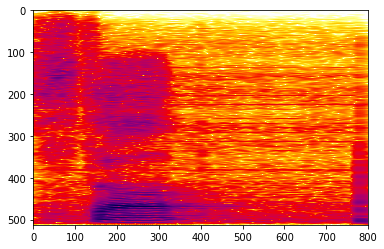

In [13]:
# Show one of the spectograms
sample = df.sample()
plt.imshow(skimage.io.imread(sample.path.iloc[0]))

In [14]:
# get the shape of the images
skimage.io.imread(sample.path.iloc[0]).shape

(513, 800, 3)

In [15]:
# shufle data frame to make diferent datasets
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,label,path
0,go,/home/jp_capo_98/Documents/ML-Speech-Recogniti...
1,unknown,/home/jp_capo_98/Documents/ML-Speech-Recogniti...
2,unknown,/home/jp_capo_98/Documents/ML-Speech-Recogniti...
3,unknown,/home/jp_capo_98/Documents/ML-Speech-Recogniti...
4,unknown,/home/jp_capo_98/Documents/ML-Speech-Recogniti...


In [16]:
paths = np.array(df.path.values)
paths[300]

'/home/jp_capo_98/Documents/ML-Speech-Recognition/Data/train/images/right/e7ea8b76_nohash_2.png'

In [17]:
labels = np.array([one_hot_dict[val] for val in df.label.values])
labels[300]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
assert paths.shape[0] == labels.shape[0]

In [19]:
print ("Paths: {}\tLabels:{}".format(paths.shape, labels.shape))

Paths: (30051,)	Labels:(30051, 12)


In [20]:
# weight initialization helper function
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return(tf.Variable(init_random_dist))

In [21]:
# bias initialization function
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,  shape=shape)
    return (tf.Variable(init_bias_vals))

In [22]:
# 2d convolutional layer
def conv2d(x, W):
    return (tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="SAME"))

In [23]:
# max pool layer
def max_pool_2by2(x):
    return (tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME"))

In [24]:
# batch noramlization
def batch_norm(x, is_train):
    return(tf.layers.batch_normalization(x, training=is_train))

In [25]:
def convolutional_layer(input_x, shape, is_train):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return (tf.nn.relu(batch_norm((conv2d(input_x, W)+b), is_train)))

In [26]:
def normal_full_layer(input_layer, size, is_train):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.nn.relu(batch_norm(tf.matmul(input_layer, W)+b, is_train)))

In [27]:
def output_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.matmul(input_layer, W)+b)

## Datasets

In [28]:
def _image_parse_fn(label, filename):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_png(image_string)
    image_resized = tf.image.resize_images(image_decoded, [160, 160])
    image_resized = tf.div(image_resized, 255)
    return image_resized, label

In [29]:
batch_size = 32
num_par_calls = 4
with tf.name_scope("Datasets"):
    # training dataset with unlimited repetitions and shuffled
    train_dataset = tf.data.Dataset.from_tensor_slices((labels[:27046], paths[:27046]))
    train_dataset = train_dataset.shuffle(28000)
    train_dataset = train_dataset.repeat()
    train_dataset = train_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
    train_dataset = train_dataset.batch(batch_size)

    # Evaluation train dataset with only one epoch and no shuffle
    eval_train_dataset = tf.data.Dataset.from_tensor_slices((labels[:27046], paths[:27046]))
    eval_train_dataset = eval_train_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
    eval_train_dataset = eval_train_dataset.batch(batch_size)
    
    # Validation dataset with only one epoch and no shuffle
    validation_dataset = tf.data.Dataset.from_tensor_slices((labels[27046:], paths[27046:]))
    validation_dataset = validation_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
    validation_dataset = validation_dataset.batch(batch_size)

## Iterator

In [30]:
with tf.name_scope("Iterator"):
    train_iterator = tf.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)
    next_element_train = train_iterator.get_next()
    train_init_op = train_iterator.make_initializer(train_dataset)
    
    eval_train_iterator = tf.data.Iterator.from_structure(eval_train_dataset.output_types, eval_train_dataset.output_shapes)
    next_element_eval_train = eval_train_iterator.get_next()
    eval_train_init_op = eval_train_iterator.make_initializer(eval_train_dataset)
    
    validation_iterator = tf.data.Iterator.from_structure(validation_dataset.output_types, validation_dataset.output_shapes)
    next_element_validation = validation_iterator.get_next()
    validation_init_op = validation_iterator.make_initializer(validation_dataset)

    
    

## Placeholders

In [31]:
with tf.name_scope("Inputs"):
    # getting array of string which will be getting the images
    x = tf.placeholder(tf.float32, shape=[None, 160, 160, 3])
    # gettin the one hot labels
    y_true = tf.placeholder(tf.float32, shape=[None, 12])
    # getting hold probability value
    hold_prob = tf.placeholder(tf.float32)
    # is training running?
    is_train = tf.placeholder(tf.bool)

## Graph

In [32]:
# 2 convolutional layers, 1 maxpool and 1 dropout
with tf.name_scope("Block1"):
    convo_1 = convolutional_layer(x, shape=[5,5,3,32], is_train=is_train)
    convo_2 = convolutional_layer(convo_1, shape=[5,5,32,32], is_train=is_train)
    maxpool_1 = max_pool_2by2(convo_2)
    dropout_1 = tf.nn.dropout(maxpool_1, keep_prob=hold_prob)
# input size [160, 160, 32] | output size [80, 80, 32]

In [33]:
# 2 convo, 1 max pool and dropout
with tf.name_scope("Block2"):
    convo_3 = convolutional_layer(dropout_1, shape=[5,5,32,64], is_train=is_train)
    convo_4 = convolutional_layer(convo_3, shape=[5,5,64,64], is_train=is_train)
    maxpool_2 = max_pool_2by2(convo_4)
    dropout_2 = tf.nn.dropout(maxpool_2, keep_prob=hold_prob)
# input size [80,80,32] | output [40, 40, 64]

In [34]:
# 3 convo, 1 max pool and dropout
with tf.name_scope("Block3"):
    convo_5 = convolutional_layer(dropout_2, shape=[5,5,64,64], is_train=is_train)
    convo_6 = convolutional_layer(convo_5, shape=[5,5,64,64], is_train=is_train)
    convo_7 = convolutional_layer(convo_6, shape=[5,5,64,64], is_train=is_train)
    maxpool_3 = max_pool_2by2(convo_7)
    dropout_3 = tf.nn.dropout(maxpool_3, keep_prob=hold_prob)
# input size [40,40,64] | output [20,20,64]

In [35]:
# fully connected layer with relu and dropout
with tf.name_scope("Full_Connected_layer_1"):
    flatten_1 = tf.reshape(dropout_3, [-1, 20*20*64])
    full_layer_1 = normal_full_layer(flatten_1, 1024, is_train)
    dropout_4 = tf.nn.dropout(full_layer_1, keep_prob=hold_prob)

In [36]:
# fully conected layer
with tf.name_scope("Output_layer"):
    y_pred = output_full_layer(dropout_4, 12)

### loss function

In [37]:
with tf.name_scope("loss"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred)
    mean_cross_entropy = tf.reduce_mean(cross_entropy)

### optimizer

In [38]:
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

### Training function

In [39]:
with tf.name_scope("training"):
    train = optimizer.minimize(mean_cross_entropy)

### Prediction function

In [40]:
with tf.name_scope("Predicting"):
    y_soft = tf.nn.softmax(y_pred)
    prediction = tf.argmax(y_soft, axis=1)

### Accuracy and loss

In [41]:
with tf.name_scope("Accuracy"):
    y_true_arg_max = tf.argmax(y_true, axis=1)
    correct_predictions = tf.equal(prediction, y_true_arg_max)
    batch_acc = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    acc_arr = tf.placeholder(tf.float32)
    full_accuracy = tf.reduce_mean(acc_arr)
    accuracy_summary = tf.summary.scalar("Accuracy", full_accuracy)

In [42]:
with tf.name_scope("Loss_for_epoch"):
    loss_arr = tf.placeholder(tf.float32)
    full_loss = tf.reduce_mean(loss_arr)
    loss_summary = tf.summary.scalar("Loss", full_loss)

### Summary merger

In [44]:
merged_op = tf.summary.merge_all()

### checkpoint saver

In [63]:
saver = tf.train.Saver()

## Variable initializer

In [43]:
init = tf.global_variables_initializer()

## Session

In [62]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(init)
    
    train_writer = tf.summary.FileWriter("./tensorboard/train", graph=tf.get_default_graph())
    validation_writer = tf.summary.FileWriter("./tensorboard/validation", graph=tf.get_default_graph())
    
    sess.run(train_init_op)
    
    for step in range(1001):
        batch_imgs, batch_labels = sess.run(next_element_train)
        train_feed = {x:batch_imgs, y_true:batch_labels, hold_prob:0.8, is_train:True}
        sess.run(train, feed_dict=train_feed)
        
        if step % 50 == 0:
            acc = []
            loss = []
            sess.run(eval_train_init_op)
            while True:
                try:
                    batch_imgs, batch_labels = sess.run(next_element_eval_train)
                except tf.errors.OutOfRangeError:
                    break
                train_eval_feed = {x:batch_imgs, y_true: batch_labels, hold_prob:1.0, is_train:False}
                acc.append(sess.run(batch_acc, feed_dict=train_eval_feed))
                loss.append(sess.run(mean_cross_entropy, feed_dict=train_eval_feed))
            train_eval_feed = {acc_arr: acc, loss_arr:loss}
            summary = sess.run(merged_op, feed_dict=train_eval_feed)
            train_writer.add_summary(summary, step)
            train_writer.flush()
            print("Saved train summary at step #{}".format(step))
            
            acc = []
            loss = []
            sess.run(validation_init_op)
            while True:
                try:
                    batch_imgs, batch_labels = sess.run(next_element_validation)
                except tf.errors.OutOfRangeError:
                    break
                validation_feed = {x:batch_imgs, y_true: batch_labels, hold_prob:1.0, is_train:False}
                acc.append(sess.run(batch_acc, feed_dict=validation_feed))
                loss.append(sess.run(mean_cross_entropy, feed_dict=validation_feed))
            validation_feed = {acc_arr: acc, loss_arr:loss}
            summary = sess.run(merged_op, feed_dict=validation_feed)
            validation_writer.add_summary(summary, step)
            validation_writer.flush()
            print("Saved validation summary at step #{}".format(step))
            
        if step % 200 == 0:
            saver.save(sess, "./model/step_{}.ckpy".format(step))
            print("Saved checkpoint in step #{}".format(step))

    print("Training is done")

KeyboardInterrupt: 

In [59]:
with tf.Session() as sess:
    sess.run(init)
    
    train_writer = tf.summary.FileWriter("./tensorboard/train", graph=tf.get_default_graph())
    validation_writer = tf.summary.FileWriter("./tensorboard/validation", graph=tf.get_default_graph())
    
    sess.run(train_init_op)
    
    batch_imgs, batch_labels = sess.run(next_element_train)
    train_feed = {x:batch_imgs, y_true:batch_labels, hold_prob:0.8, is_train:True}
    loss = sess.run(mean_cross_entropy, feed_dict=train_feed)

In [56]:
full_loss

1000.0